
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [178]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Delft, Netherlands

In [179]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 4 # 6 minutes hour of simulation
params.nP = 300 # reuqests (and passengers)
params.nV = 5 # vehicles
params.kpi = i

## Parameters for ExMAS

In [180]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [181]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

26-02-23 11:07:24-INFO-Initializing pairwise trip shareability between 300 and 300 trips.
26-02-23 11:07:24-INFO-creating combinations
26-02-23 11:07:24-INFO-89700	 nR*(nR-1)
26-02-23 11:07:25-INFO-Reduction of feasible pairs by 99.80%
26-02-23 11:07:25-INFO-Degree 2 	Completed
26-02-23 11:07:25-INFO-trips to extend at degree 2 : 380
26-02-23 11:07:25-INFO-At degree 2 feasible extensions found out of 32 searched
26-02-23 11:07:25-INFO-Degree 3 	Completed
26-02-23 11:07:25-INFO-trips to extend at degree 3 : 32
26-02-23 11:07:25-INFO-At degree 3 feasible extensions found out of 2 searched
26-02-23 11:07:25-INFO-Degree 4 	Completed
26-02-23 11:07:25-INFO-Max degree reached 4
26-02-23 11:07:25-INFO-Trips still possible to extend at degree 4 : 2


In [182]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

26-02-23 11:07:25-INFO-Matching 300 trips to 714 rides in order to min u_veh
26-02-23 11:07:25-INFO-Problem solution: Optimal. 
Total costs for single trips:         80,506 
reduced by matching to:               69,299


In [183]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],7.622000,412,1,[7.622],"[0, 412]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1433963028, 1413910854]","[None, 0, 0]",node time req_id od 0 ...,412,4.12,6.180000,1.236000,4.9440
1,[1],4.723500,255,1,[4.7235],"[15, 255]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44880453, 44850689]","[None, 1, 1]",node time req_id od 0 NaN...,255,2.55,3.831000,0.766200,3.0648
2,[2],3.220500,174,1,[3.2205],"[18, 174]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 4246176868, 44825524]","[None, 2, 2]",node time req_id od 0 ...,174,1.74,2.611500,0.522300,2.0892
3,[3],3.023000,163,1,[3.023],"[24, 163]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 4217813223, 4883670378]","[None, 3, 3]",node time req_id od 0 ...,163,1.63,2.452500,0.490500,1.9620
4,[4],14.380500,777,1,[14.3805],"[66, 777]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1402613311, 1448535785]","[None, 4, 4]",node time req_id od 0 ...,777,7.77,11.661000,2.332200,9.3288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,"[236, 237, 238]",21.998725,983,30,"[7.603275, 4.624874999999999, 9.770575000000001]","[10859.5, 182, 53, 242, 135, 371]","[236, 237, 238]","[237, 236, 238]",3,709,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44704697, 1608998297, 1608998294, 57148...","[None, 236, 237, 238, 237, 236, 238]",node time req_id od 0 ...,983,9.83,13.970250,2.794050,11.1762
710,"[111, 114, 116]",18.728300,787,30,"[7.9124, 3.772825, 7.043075]","[5926.5, 79, 208, 29, 253, 218]","[111, 114, 116]","[114, 111, 116]",3,710,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 3669180587, 44905729, 4862057241, 44837...","[None, 111, 114, 116, 114, 111, 116]",node time req_id od 0 ...,787,7.87,12.547125,2.509425,10.0377
711,"[15, 14, 17]",19.414450,882,30,"[7.834825, 5.486925, 6.092700000000001]","[695.5, 133, 315, 81, 90, 263]","[15, 14, 17]","[14, 15, 17]",3,711,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44814118, 44831011, 3995048391, 4485205...","[None, 15, 14, 17, 14, 15, 17]",node time req_id od 0 ...,882,8.82,12.423375,2.484675,9.9387
712,"[74, 79, 80, 78]",20.411725,672,42,"[4.121125, 5.23635, 6.537825, 4.516425]","[4249.5, 72, 154, 7, 71, 88, 104, 176]","[74, 79, 80, 78]","[74, 79, 78, 80]",4,712,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44852429, 44871813, 1371031431, 4487322...","[None, 74, 79, 80, 78, 74, 79, 78, 80]",node time req_id od 0 ...,672,6.72,12.758625,2.551725,10.2069


In [185]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
params.kpi = 1
#params.kpi = i
sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/veh{}.csv'.format(i))
sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/pax{}.csv'.format(i))

26-02-23 11:08:04-INFO-Matching 300 trips to 714 rides in order to min u_veh
26-02-23 11:08:04-INFO-Problem solution: Optimal. 
Total costs for single trips:         80,506 
reduced by matching to:               69,299
0.5
26-02-23 11:08:10-CRITICAL-this is request 0 with [0, 444, 498, 595, 596] available rides.
26-02-23 11:08:10-CRITICAL-ride 0 available [1]
26-02-23 11:08:10-CRITICAL-ride 444 available [1, 0]
26-02-23 11:08:10-CRITICAL-ride 498 available [1, 0]
26-02-23 11:08:10-CRITICAL-ride 595 available [1, 0]
26-02-23 11:08:10-CRITICAL-ride 596 available [1, 0]
26-02-23 11:08:10-CRITICAL-this is reuqest 0 with [0, 444, 498, 595, 596] still available rides.
Profit Maximization
26-02-23 11:08:10-CRITICAL-vehicle 1 has 5 choices
0.5
0.5
0.5
0.5
26-02-23 11:08:10-CRITICAL-this is request 4 with [4, 608] available rides.
26-02-23 11:08:10-CRITICAL-ride 4 available [1]
26-02-23 11:08:10-CRITICAL-ride 608 not available [1, 3]
26-02-23 11:08:10-CRITICAL-this is reuqest 4 with [4] still a

In [186]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,5,0.0,False,0,0,30.0,15.0,0,127.0,0,...,0,0,19330.0,1048.0,0.0,899.0,292.0,17091.0,14.320,3.3048
2,8,0.0,False,0,0,88.0,15.0,0,140.0,0,...,0,0,18799.0,1435.0,0.0,882.0,395.0,16087.0,16.583,1.8924
3,22,0.0,False,0,0,174.0,19.0,0,300.0,0,...,0,0,12292.0,4479.0,0.0,3675.0,979.0,3159.0,63.345,4.6188
4,1,0.0,False,0,0,76.0,15.0,0,20.0,0,...,0,0,19894.0,777.0,0.0,787.0,65.0,18265.0,7.774,9.3288
5,22,0.0,False,0,0,175.0,16.0,0,511.0,0,...,0,0,0.0,4284.0,3600.0,2612.0,1171.0,-11667.0,62.348,3.9408


In [187]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.3048, 1.8923999999999999, 4.6188, 9.3288, 3.9408000000000003]

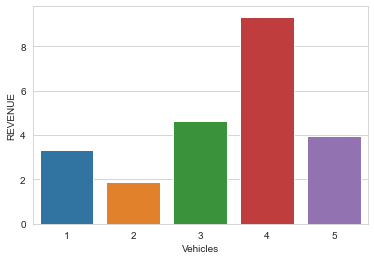

In [188]:
import seaborn as sns
sns.set_style("whitegrid")
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [189]:
sim.res[0].all_kpi # All driver revenue 

23.0856

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [190]:
params.kpi = 2

In [191]:
params.kpi = 1
#params.kpi = i
sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/veh{}.csv'.format(i))
sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/pax{}.csv'.format(i))
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate


0.5
26-02-23 11:08:46-CRITICAL-this is request 0 with [0, 444, 498, 595, 596] available rides.
26-02-23 11:08:46-CRITICAL-ride 0 available [1]
26-02-23 11:08:46-CRITICAL-ride 444 available [1, 0]
26-02-23 11:08:46-CRITICAL-ride 498 available [1, 0]
26-02-23 11:08:46-CRITICAL-ride 595 available [1, 0]
26-02-23 11:08:46-CRITICAL-ride 596 available [1, 0]
26-02-23 11:08:46-CRITICAL-this is reuqest 0 with [0, 444, 498, 595, 596] still available rides.
Pooled rides
26-02-23 11:08:46-CRITICAL-vehicle 1 has 5 choices
0.5
0.5
0.5
0.5
26-02-23 11:08:47-CRITICAL-this is request 4 with [4, 608] available rides.
26-02-23 11:08:47-CRITICAL-ride 4 available [1]
26-02-23 11:08:47-CRITICAL-ride 608 not available [1, 3]
26-02-23 11:08:47-CRITICAL-this is reuqest 4 with [4] still available rides.
0.5
0.5
26-02-23 11:08:47-CRITICAL-this is request 8 with [8, 380] available rides.
26-02-23 11:08:47-CRITICAL-ride 8 available [1]
26-02-23 11:08:47-CRITICAL-ride 380 not available [5, 1]
26-02-23 11:08:47-CRI

In [171]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,6,0.0,False,0,0,50.0,15.0,0,100.0,0,...,0,0,19562.0,1194.0,0.0,498.0,295.0,17575.0,13.852,1.9332
2,14,0.0,False,0,0,208.0,15.0,0,343.0,0,...,0,0,0.0,2136.0,3600.0,2061.0,778.0,-8575.0,29.323,0.1344
3,12,0.0,False,0,0,85.0,18.0,0,450.0,0,...,0,0,0.0,1539.0,3600.0,1781.0,828.0,-7748.0,28.195,2.0088
4,3,0.0,False,0,0,194.0,15.0,0,60.0,0,...,0,0,0.0,487.0,3600.0,1184.0,165.0,-5436.0,10.563,6.5097
5,12,0.0,False,0,0,172.0,21.0,0,200.0,0,...,0,0,17641.0,2043.0,0.0,1162.0,581.0,13855.0,23.864,1.8480


In [172]:
sim.res[0].veh_exp['REVENUE'].to_list()

[1.9332, 0.13440000000000002, 2.0088, 6.5097, 1.848]

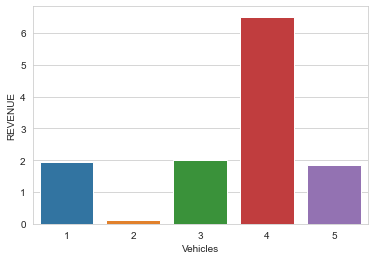

In [173]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [174]:
sim.res[0].all_kpi # All driver revenue 

12.434099999999999

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [136]:
params.kpi = 3

In [137]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

26-02-23 10:46:43-WARNING-Setting up 4h simulation at 2023-02-26 08:46:14 for 5 vehicles and 300 passengers in Delft, Netherlands
0.5
26-02-23 10:46:43-CRITICAL-this is request 0 with [0, 589] available rides.
26-02-23 10:46:43-CRITICAL-ride 0 available [1]
26-02-23 10:46:43-CRITICAL-ride 589 available [1, 0]
26-02-23 10:46:43-CRITICAL-this is reuqest 0 with [0, 589] still available rides.
26-02-23 10:46:43-CRITICAL-vehicle 1 has 2 choices
0.5
0.5
26-02-23 10:46:43-CRITICAL-this is request 2 with [2, 589] available rides.
26-02-23 10:46:43-CRITICAL-ride 2 available [1]
26-02-23 10:46:43-CRITICAL-ride 589 not available [5, 1]
26-02-23 10:46:43-CRITICAL-this is reuqest 2 with [2] still available rides.
0.5
0.5
26-02-23 10:46:43-CRITICAL-this is request 4 with [4, 329, 566] available rides.
26-02-23 10:46:43-CRITICAL-ride 4 available [1]
26-02-23 10:46:43-CRITICAL-ride 329 available [1, 0]
26-02-23 10:46:43-CRITICAL-ride 566 available [1, 0]
26-02-23 10:46:43-CRITICAL-this is reuqest 4 wi

In [138]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,28,0.0,False,0,0,210.0,29.0,0,506.0,0,...,0,0,10901.0,5721.0,0.0,3392.0,1375.0,413.0,75.358,5.7624
2,6,0.0,False,0,0,224.0,30.0,0,100.0,0,...,0,0,19298.0,960.0,0.0,807.0,310.0,17221.0,12.992,6.1731
3,6,0.0,False,0,0,287.0,21.0,0,314.0,0,...,0,0,18062.0,1420.0,0.0,1315.0,515.0,14812.0,20.344,2.6016
4,15,0.0,False,0,0,345.0,15.0,0,187.0,0,...,0,0,16633.0,2457.0,0.0,1512.0,652.0,12012.0,30.839,0.9852
5,12,0.0,False,0,0,258.0,15.0,0,235.0,0,...,0,0,0.0,1514.0,3600.0,1264.0,595.0,-6973.0,22.659,1.7508


In [139]:
sim.res[0].veh_exp['REVENUE'].to_list()

[5.7623999999999995,
 6.1731,
 2.6016000000000004,
 0.9852000000000001,
 1.7508000000000004]

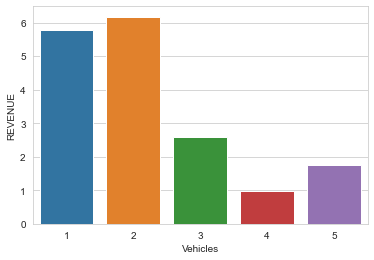

In [140]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [141]:
sim.res[0].all_kpi # All driver revenue 

17.2731